In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os, uuid
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient, BlobClient, ContainerClient
from io import BytesIO
warnings.filterwarnings('ignore')
sns.set()

In [625]:
connect_str = os.getenv('AZURE_STORAGE_CONNECTION_STRING')
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client("data")

In [626]:
def download_blob_to_df(blob_name):
    blob_client = container_client.get_blob_client(blob_name)
    download_stream = blob_client.download_blob()
    blob_data = BytesIO(download_stream.readall())
    return pd.read_csv(blob_data)

In [627]:
humanForYou = download_blob_to_df("HumanForYou_datas.csv")

In [628]:
humanForYou.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AttendanceScore
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,42
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,115


In [629]:
# Suppression des valeurs non éthiques

humanForYouCopy = humanForYou.copy()

humanForYouCopy.drop("Age", axis=1, inplace=True)
humanForYouCopy.drop("Over18", axis=1, inplace=True)
humanForYouCopy.drop("Gender", axis=1, inplace=True)
humanForYouCopy.drop("MaritalStatus", axis=1, inplace=True)

In [630]:
humanForYouCopy.describe()

,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AttendanceScore
count,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.687528,15.209524,8.0,0.793878,...,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.725170,2.729478,2.763492,76.167574
std,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.495967,3.659108,0.0,0.851883,...,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.089852,1.098904,0.703541,100.022045
min,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,...,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,0.000000
50%,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000
75%,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,...,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,205.000000
max,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,248.000000


In [631]:
# Suppression des valeurs inutiles
humanForYouCopy.drop("EmployeeCount", axis=1, inplace=True)
humanForYouCopy.drop("EmployeeID", axis=1, inplace=True)

array([[<Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>],
       [<Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>],
       [<Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>],
       [<Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'

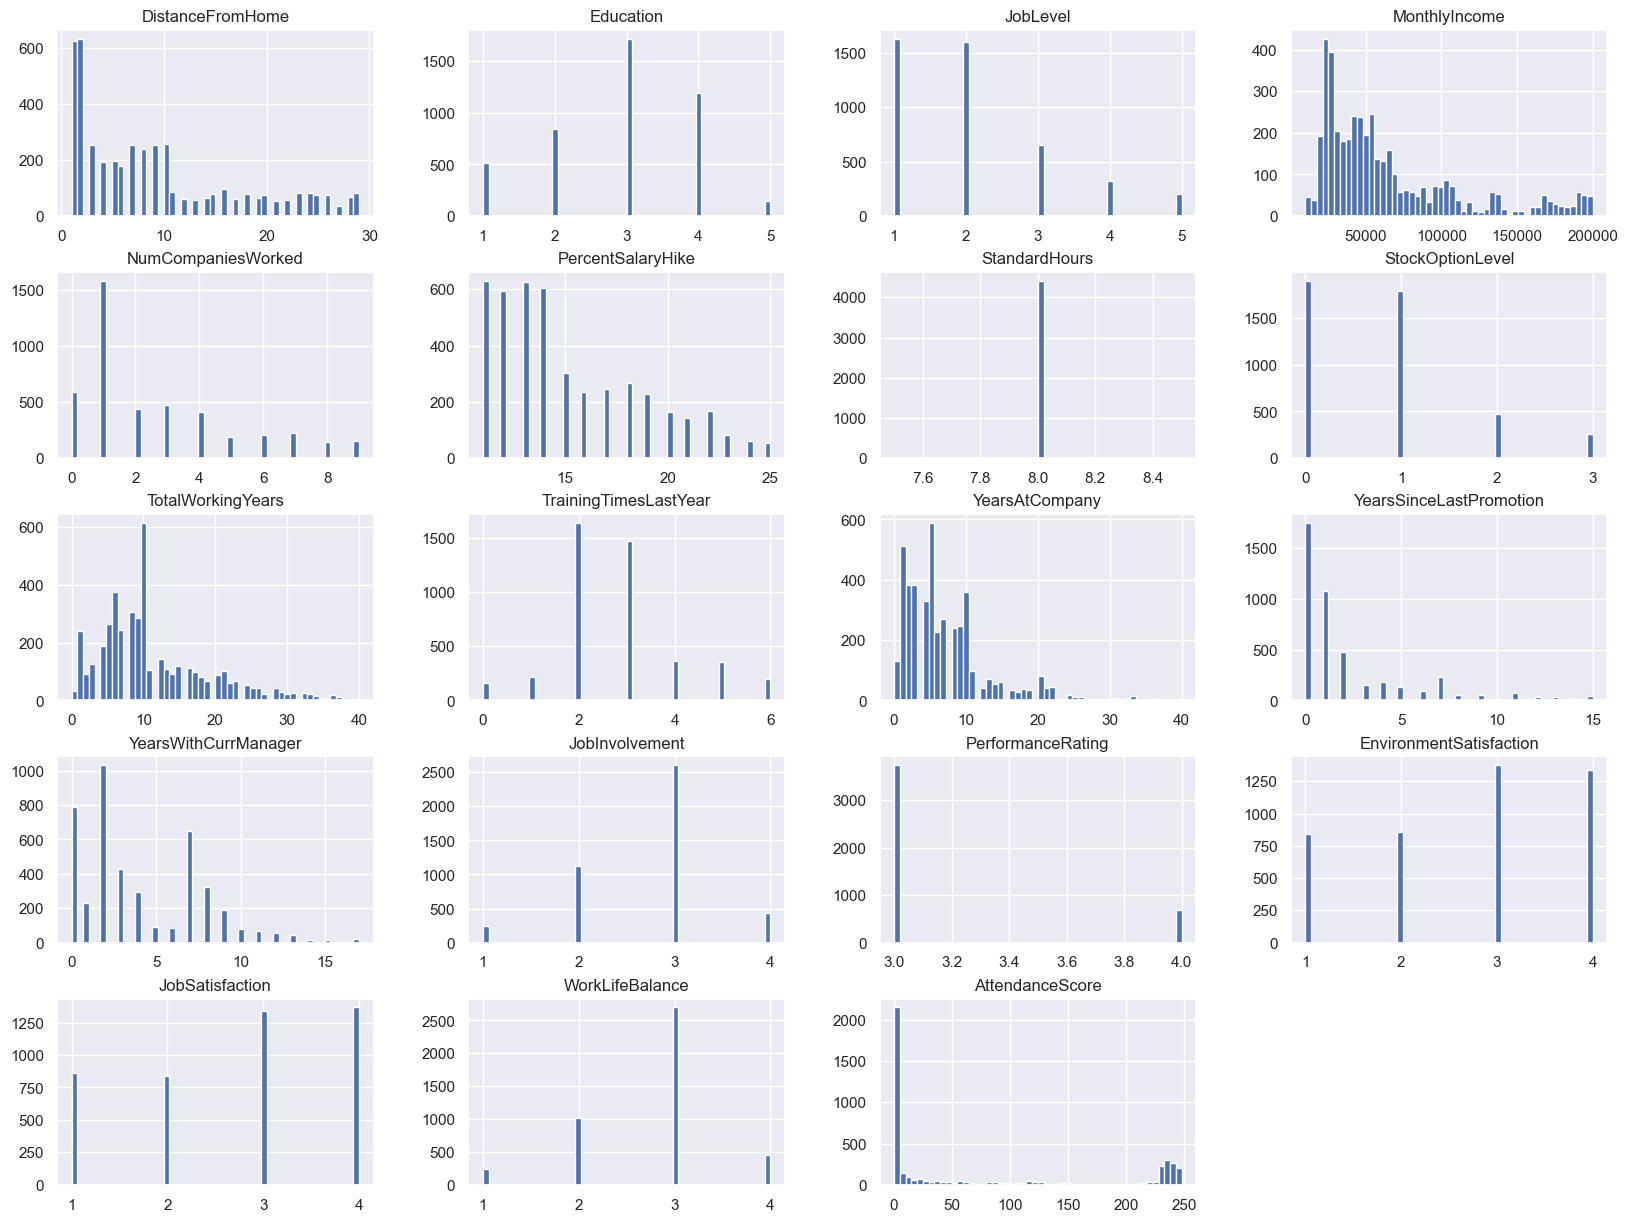

In [632]:
# Histogramme des valeurs

humanForYouCopy.hist(bins=50, figsize=(20, 15))

In [633]:
# Encodage des variables catégorielles

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

humanForYouCopy["Department"] = encoder.fit_transform(humanForYouCopy[["Department"]])
humanForYouCopy["EducationField"] = encoder.fit_transform(humanForYouCopy[["EducationField"]])
humanForYouCopy["JobRole"] = encoder.fit_transform(humanForYouCopy[["JobRole"]])

humanForYouCopy["Attrition"] = humanForYouCopy["Attrition"].map({"Yes": 1, "No": 0})

# Transform the BusinessTravel column to numerical values with 0 for No Travel, 1 for Travel Rarely, 2 for Travel Frequently

humanForYouCopy["BusinessTravel"] = humanForYouCopy["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2})

humanForYouCopy["PercentSalaryHike"] = humanForYouCopy["PercentSalaryHike"] / 100

humanForYouCopy.drop("StandardHours", axis=1, inplace=True)

In [634]:
humanForYouCopy.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,AttendanceScore
0,0,1,2.0,6,2,1.0,1,0.0,131160,1.0,...,6,1,0,0,3,3,3.0,4.0,2.0,0
1,1,2,1.0,10,1,1.0,1,6.0,41890,0.0,...,3,5,1,4,2,4,3.0,2.0,4.0,42
2,0,2,1.0,17,4,4.0,4,7.0,193280,1.0,...,2,5,0,3,3,3,2.0,2.0,1.0,0
3,0,0,1.0,2,5,1.0,3,1.0,83210,3.0,...,5,8,7,5,2,3,4.0,4.0,3.0,0
4,0,1,1.0,10,1,3.0,1,7.0,23420,4.0,...,2,6,0,4,3,3,4.0,1.0,3.0,115


In [635]:
humanForYouCopy = humanForYouCopy.fillna(0)

<Axes: >

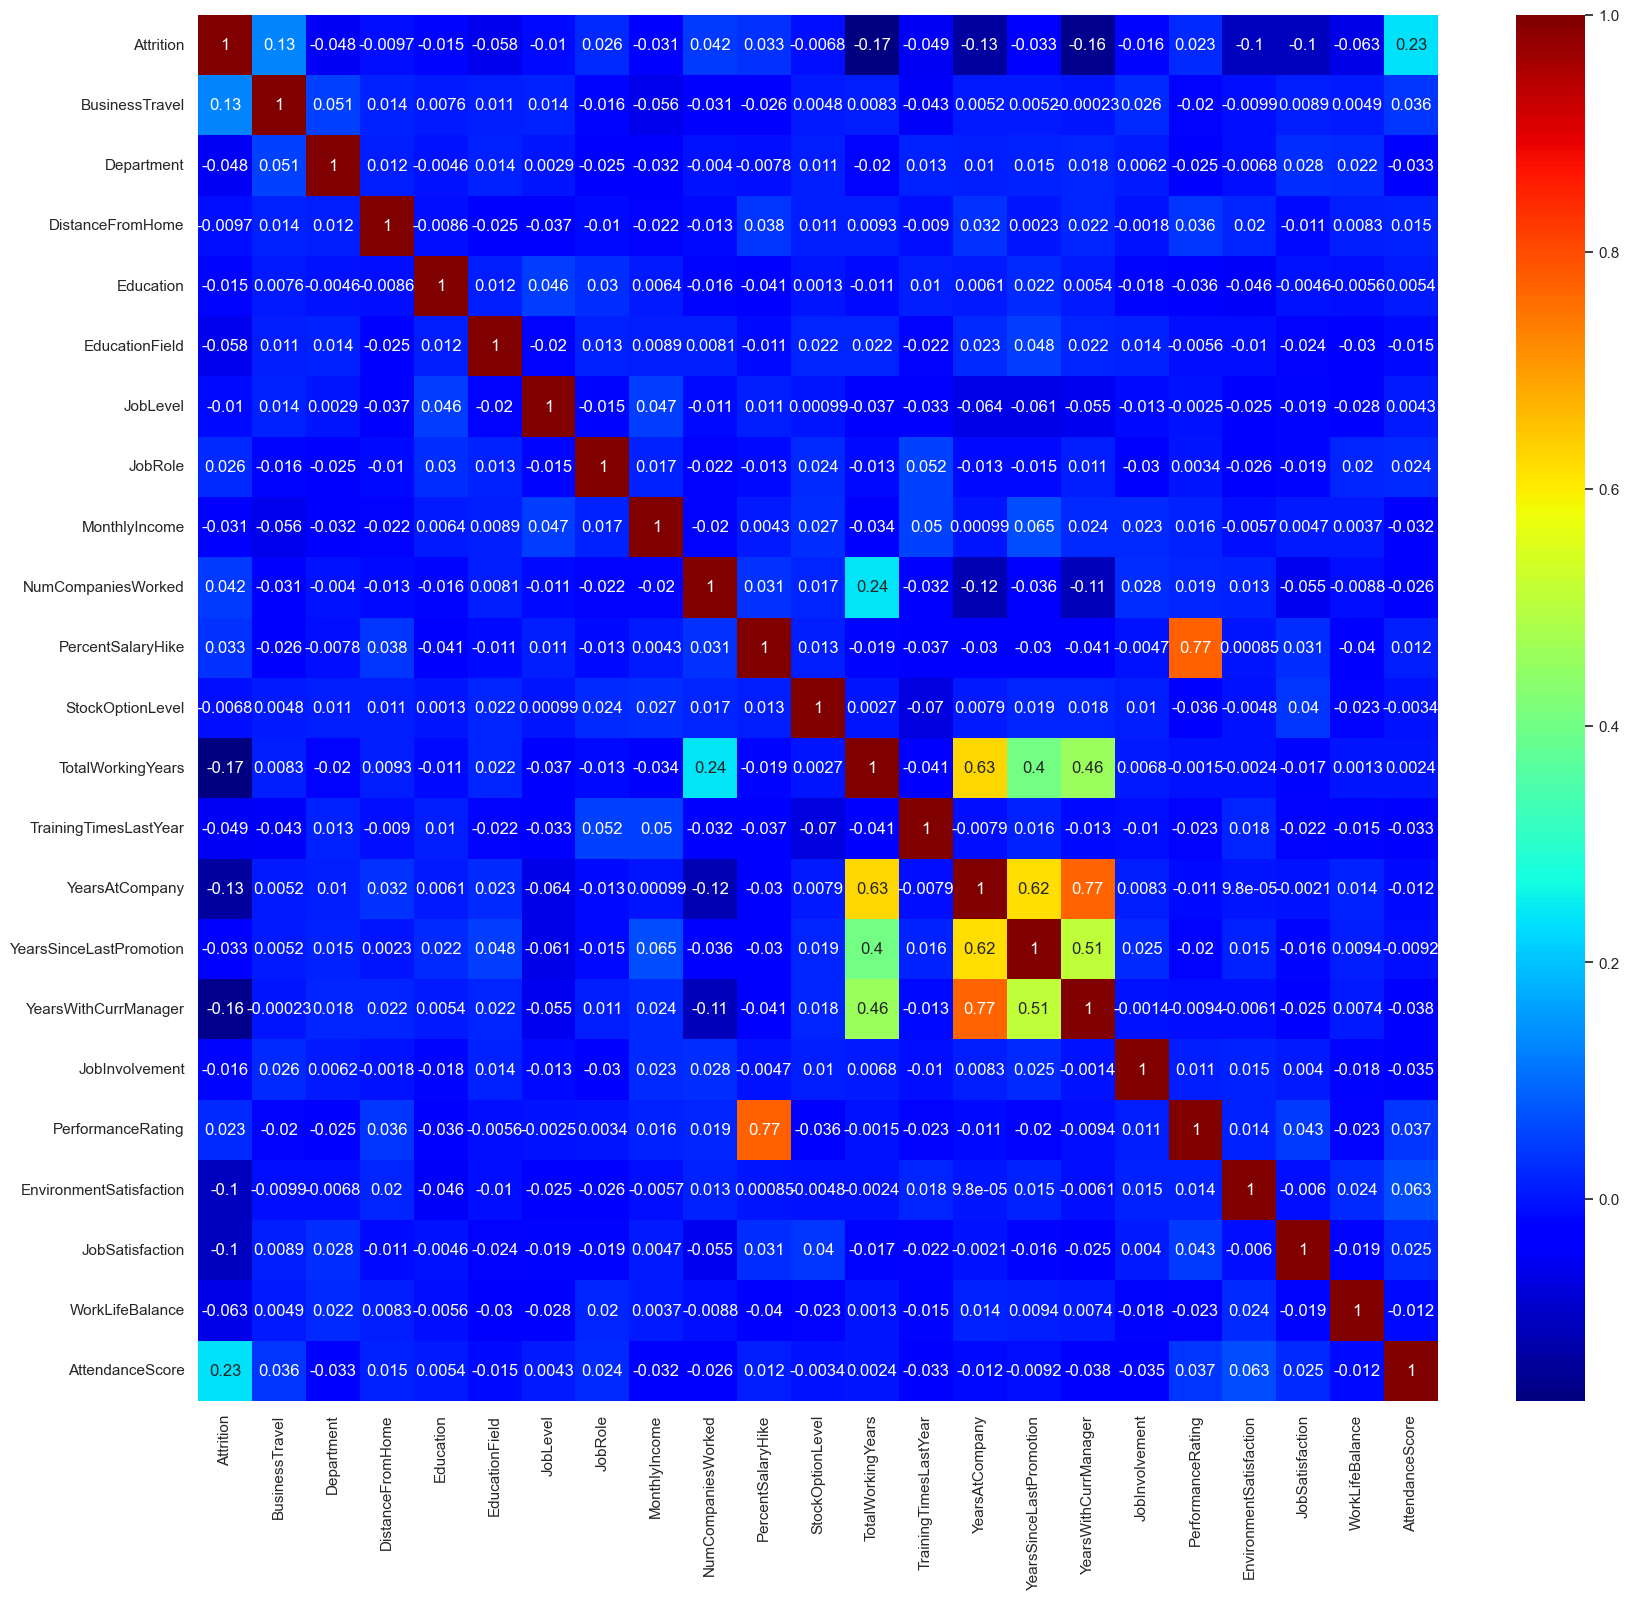

In [636]:
# Visualisation des corrélations

corr_matrix = humanForYouCopy.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap("jet"))



<Axes: >

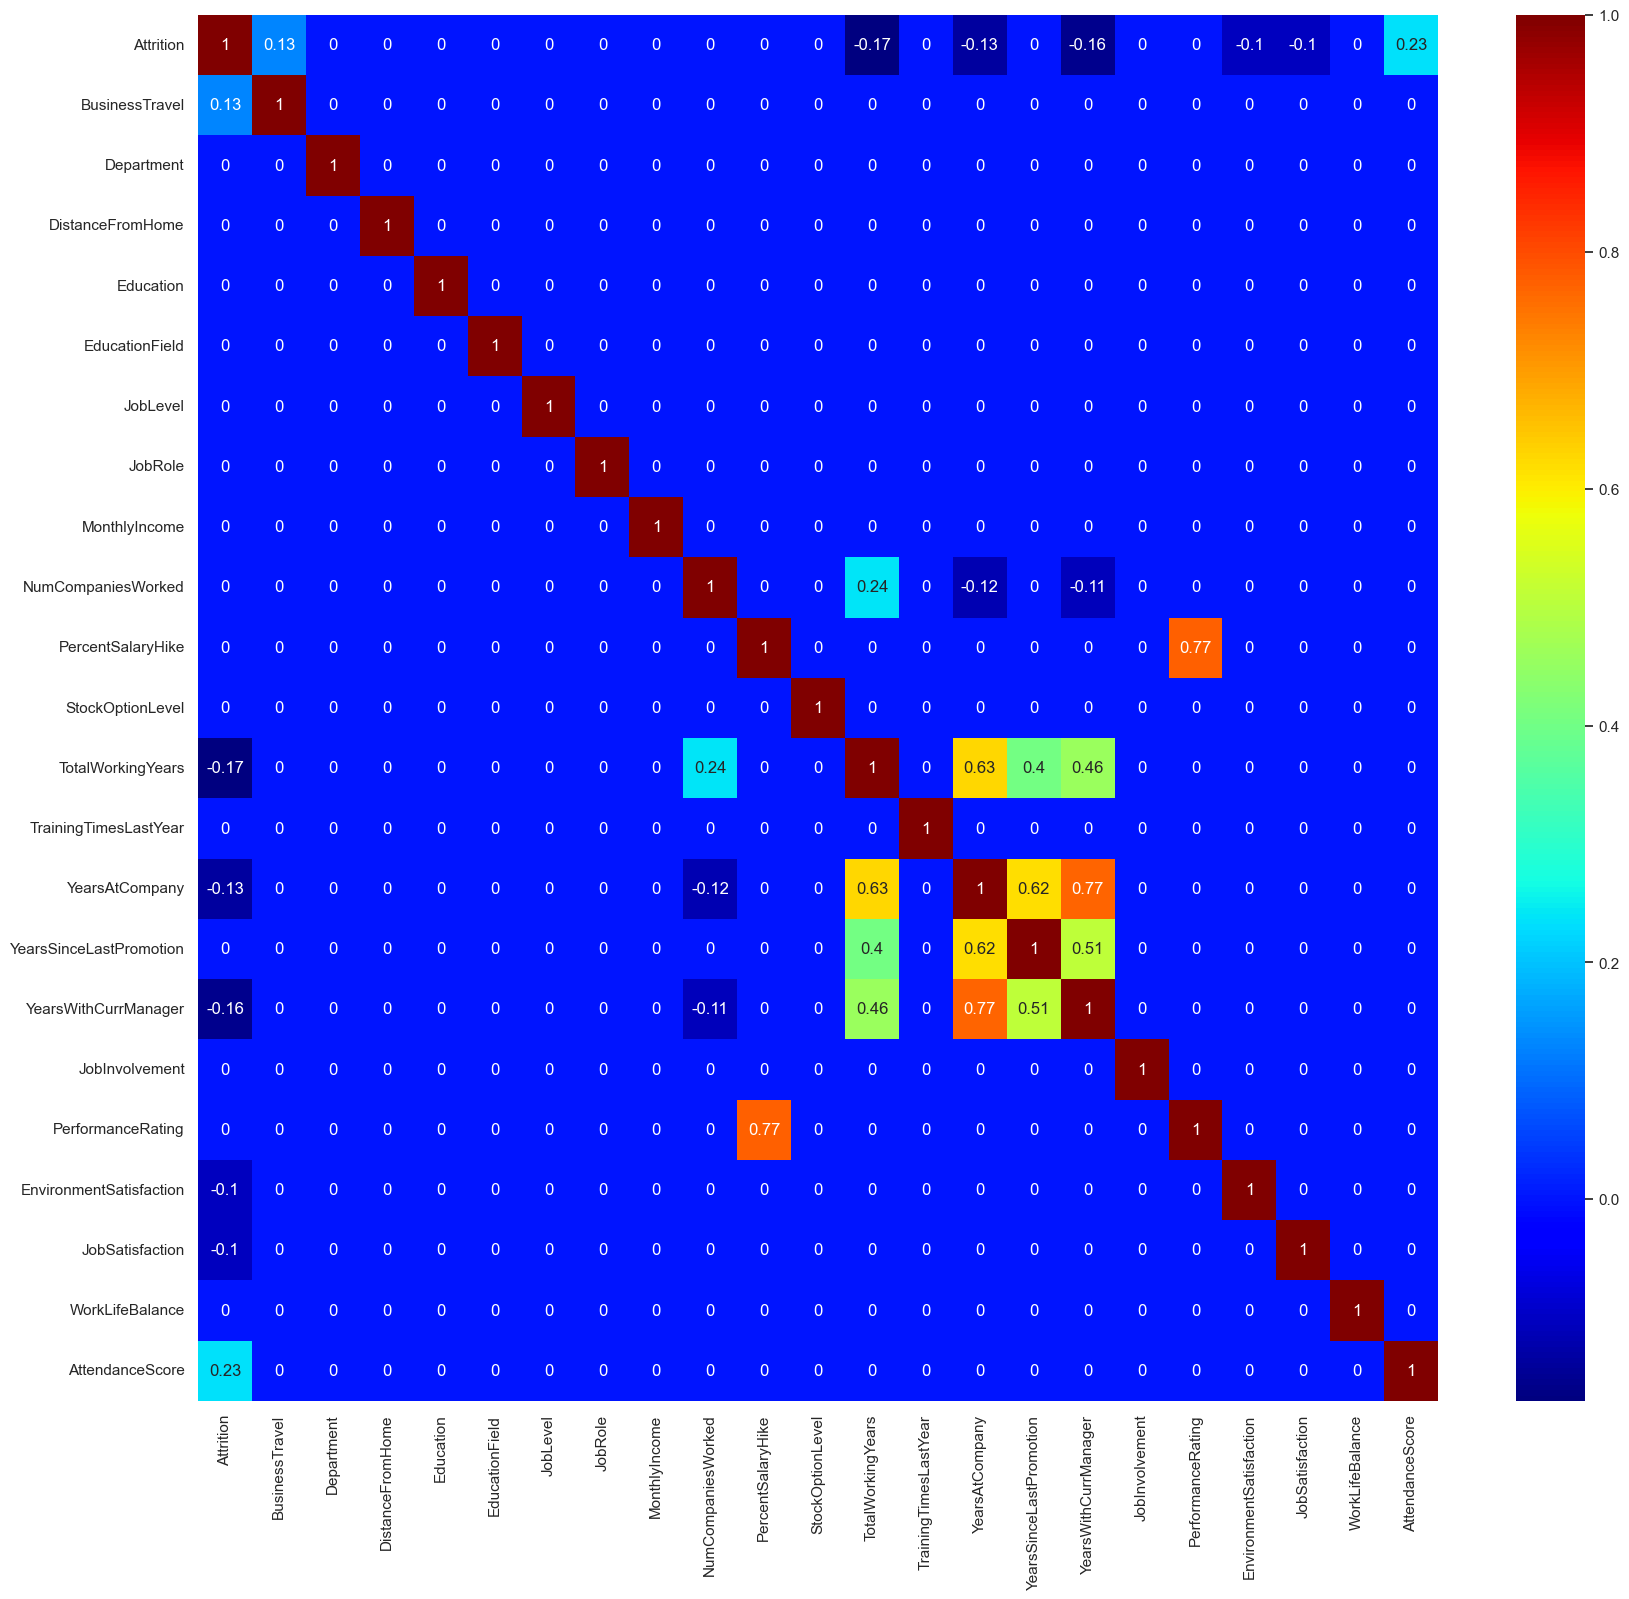

In [637]:
# Set value between -0.1 and 0.1 to 0 to remove noise

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) < 0.1:
            corr_matrix.iloc[i, j] = 0
            
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap=plt.get_cmap("jet"))

In [638]:
# Suppression des colonnes non corrélées

humanForYouCopy.drop("Department", axis=1, inplace=True)
humanForYouCopy.drop("EducationField", axis=1, inplace=True)
humanForYouCopy.drop("JobRole", axis=1, inplace=True)
humanForYouCopy.drop("DistanceFromHome", axis=1, inplace=True)
humanForYouCopy.drop("Education", axis=1, inplace=True)
humanForYouCopy.drop("JobLevel", axis=1, inplace=True)
humanForYouCopy.drop("MonthlyIncome", axis=1, inplace=True)
humanForYouCopy.drop("NumCompaniesWorked", axis=1, inplace=True)
humanForYouCopy.drop("PercentSalaryHike", axis=1, inplace=True)
humanForYouCopy.drop("StockOptionLevel", axis=1, inplace=True)
humanForYouCopy.drop("TrainingTimesLastYear", axis=1, inplace=True)
humanForYouCopy.drop("YearsSinceLastPromotion", axis=1, inplace=True)
humanForYouCopy.drop("JobInvolvement", axis=1, inplace=True)
humanForYouCopy.drop("PerformanceRating", axis=1, inplace=True)
humanForYouCopy.drop("WorkLifeBalance", axis=1, inplace=True)

In [639]:
humanForYouCopy.head()

,Attrition,BusinessTravel,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,AttendanceScore
0,0,1,1.0,1,0,3.0,4.0,0
1,1,2,6.0,5,4,3.0,2.0,42
2,0,2,5.0,5,3,2.0,2.0,0
3,0,0,13.0,8,5,4.0,4.0,0
4,0,1,9.0,6,4,4.0,1.0,115


In [640]:
def save_df_to_blob(dataframe, container_name, blob_name, connection_string):
    blob_io = BytesIO()
    dataframe.to_csv(blob_io, index=False)
    blob_io.seek(0)

    blob_service_client = BlobServiceClient.from_connection_string(connection_string)

    blob_client = blob_service_client.get_container_client(container_name).get_blob_client(blob_name)

    blob_client.upload_blob(blob_io, blob_type="BlockBlob", overwrite=True)

In [641]:
save_df_to_blob(humanForYouCopy, 'data', 'DataCleaned.csv', os.getenv('AZURE_STORAGE_CONNECTION_STRING'))

In [642]:
# Convert Attrition to category

"""humanForYouCopy["Attrition"] = humanForYouCopy["Attrition"].astype("category")

humanForYouCopy.head()"""

'humanForYouCopy["Attrition"] = humanForYouCopy["Attrition"].astype("category")\n\nhumanForYouCopy.head()'

In [643]:
# Split des données en train et test de façon aléatoire

from sklearn.model_selection import train_test_split

X = humanForYouCopy.drop("Attrition", axis=1)
y = humanForYouCopy["Attrition"]

# Scaler les données

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52, shuffle=True)

In [644]:
# Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_validate

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

# Évaluation sur le training set
y_train_pred = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Set Accuracy: ", train_accuracy)

# Vos calculs précédents pour le test set et la validation croisée
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))



Accuracy Score:  0.9750566893424036

Confusion Matrix: 
 [[738   5]
 [ 17 122]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       743
           1       0.96      0.88      0.92       139

    accuracy                           0.98       882
   macro avg       0.97      0.94      0.95       882
weighted avg       0.97      0.98      0.97       882

Training Set Accuracy:  0.9946145124716553
Test Set Accuracy:  0.9750566893424036


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix



In [646]:
# CROSS validation score

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring="accuracy")

cv_score

array([0.94334278, 0.95184136, 0.95467422, 0.9631728 , 0.95467422,
       0.95184136, 0.96883853, 0.95467422, 0.97443182, 0.94318182])

In [647]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average='weighted'))
print('Recall:', recall_score(y_test, y_pred,
                              average='weighted'))
print('Precision:', precision_score(y_test, y_pred,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test, y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

# Cross Validation Score on a test set

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(rfc, X_test, y_test, cv=10, scoring="accuracy")

print("Cross Validation Score: ", cv_score.mean())

Accuracy: 0.9750566893424036
F1 score: 0.974593964726171
Recall: 0.9750566893424036
Precision: 0.9748273897172502

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       743
           1       0.96      0.88      0.92       139

    accuracy                           0.98       882
   macro avg       0.97      0.94      0.95       882
weighted avg       0.97      0.98      0.97       882


 confussion matrix:
 [[738   5]
 [ 17 122]]
Cross Validation Score:  0.8775280898876403


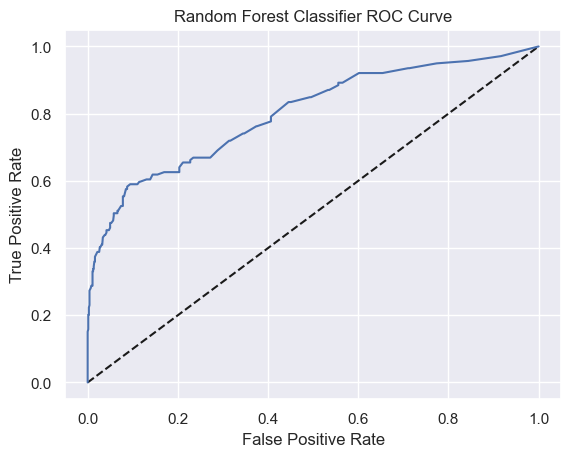

AUC Score:  0.9354841833128382


In [648]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = cross_val_predict(rfc, X_test, y_test, cv=3,
                                    method='predict_proba')
y_scores_forest=y_proba[:,1]
fpr, tpr, thresholds_forest = roc_curve(y_test,y_scores_forest)

plt.plot([0, 1], [0, 1], "k--")

plt.plot(fpr, tpr, label="Random Forest Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

print("AUC Score: ", roc_auc_score(y_test, y_pred))

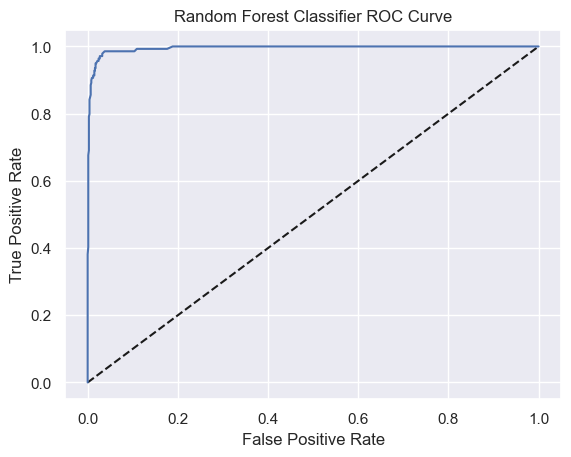

AUC Score:  0.9949311076038228


In [649]:
# Roc Curve and AUC

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = rfc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], "k--")

plt.plot(fpr, tpr, label="Random Forest Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.show()

print("AUC Score: ", roc_auc_score(y_test, y_pred_proba))

In [650]:
# Cross Validation Score on a test set

from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(rfc, X_test, y_test, cv=10, scoring="accuracy")

print("Cross Validation Score: ", cv_score.mean())

Cross Validation Score:  0.8752553626149131


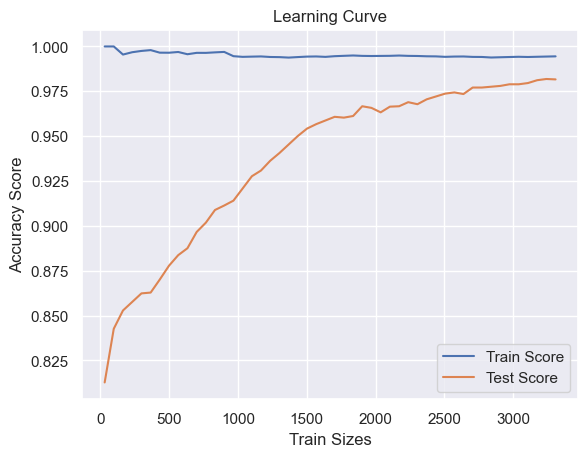

In [651]:
# Learning Curve to check if the model is overfitting or underfitting

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rfc, X, y, cv=4, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train Score")
plt.plot(train_sizes, test_mean, label="Test Score")

plt.xlabel("Train Sizes")
plt.ylabel("Accuracy Score")

plt.title("Learning Curve")
plt.legend()
plt.show()

In [652]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.8616780045351474

Confusion Matrix: 
 [[732  11]
 [111  28]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       743
           1       0.72      0.20      0.31       139

    accuracy                           0.86       882
   macro avg       0.79      0.59      0.62       882
weighted avg       0.84      0.86      0.83       882


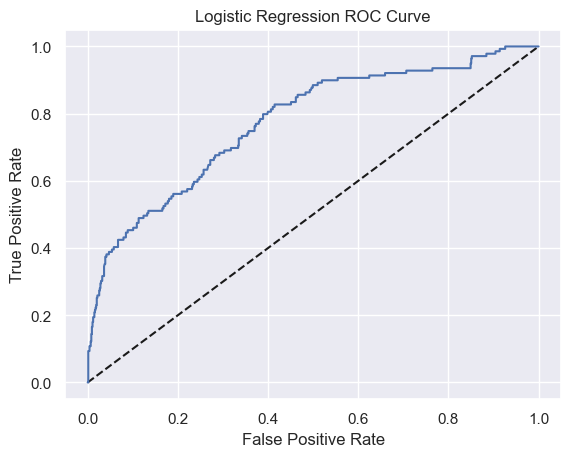

AUC Score:  0.7741752761989601


In [653]:
# Roc Curve and AUC

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], "k--")

plt.plot(fpr, tpr, label="Logistic Regression")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

print("AUC Score: ", roc_auc_score(y_test, y_pred_proba))

In [654]:
# Decusion Tree Classifier Model

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.9659863945578231

Confusion Matrix: 
 [[732  11]
 [ 19 120]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       743
           1       0.92      0.86      0.89       139

    accuracy                           0.97       882
   macro avg       0.95      0.92      0.93       882
weighted avg       0.97      0.97      0.97       882


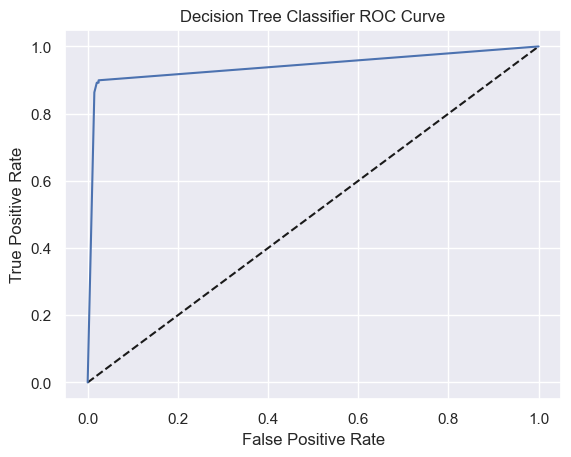

AUC Score:  0.9413518982929404


In [655]:
# Roc Curve and AUC

y_pred_proba = dtc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0, 1], [0, 1], "k--")

plt.plot(fpr, tpr, label="Decision Tree Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree Classifier ROC Curve")
plt.show()

print("AUC Score: ", roc_auc_score(y_test, y_pred_proba))

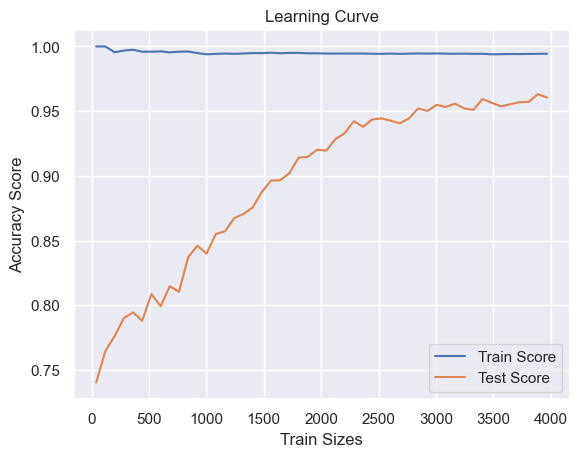

In [656]:
# Learning Curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, cv=10, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train Score")
plt.plot(train_sizes, test_mean, label="Test Score")

plt.xlabel("Train Sizes")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [657]:
# Gradient Boosting Classifier Model

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.8820861678004536

Confusion Matrix: 
 [[729  14]
 [ 90  49]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       743
           1       0.78      0.35      0.49       139

    accuracy                           0.88       882
   macro avg       0.83      0.67      0.71       882
weighted avg       0.87      0.88      0.86       882


In [658]:
# Support Vector Machine Model

from sklearn.svm import SVC

svc = SVC(probability=True)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.8820861678004536

Confusion Matrix: 
 [[738   5]
 [ 99  40]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       743
           1       0.89      0.29      0.43       139

    accuracy                           0.88       882
   macro avg       0.89      0.64      0.68       882
weighted avg       0.88      0.88      0.86       882


In [659]:
# Kmeans Model classification Model

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

kmeans.fit(X_train, y_train)

y_pred = kmeans.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.4421768707482993

Confusion Matrix: 
 [[280 463]
 [ 29 110]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.38      0.53       743
           1       0.19      0.79      0.31       139

    accuracy                           0.44       882
   macro avg       0.55      0.58      0.42       882
weighted avg       0.79      0.44      0.50       882


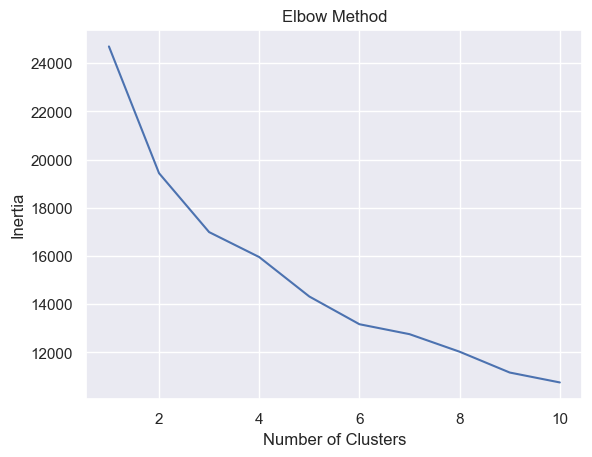

In [660]:
# Elbow Method to find the best number of clusters

inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train, y_train)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [661]:
# Kmeans Model classification Model

kmeans = KMeans(n_clusters=4)

kmeans.fit(X_train, y_train)

y_pred = kmeans.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))


Accuracy Score:  0.3333333333333333

Confusion Matrix: 
 [[283 123 144 193]
 [ 32  11  65  31]
 [  0   0   0   0]
 [  0   0   0   0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.38      0.53       743
           1       0.08      0.08      0.08       139
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.33       882
   macro avg       0.25      0.12      0.15       882
weighted avg       0.77      0.33      0.46       882


In [662]:
# classification Model

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Accuracy Score:  0.873015873015873

Confusion Matrix: 
 [[719  24]
 [ 88  51]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       743
           1       0.68      0.37      0.48       139

    accuracy                           0.87       882
   macro avg       0.79      0.67      0.70       882
weighted avg       0.86      0.87      0.86       882
